In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


import tensorflow as tf 


In [2]:
data = pd.read_csv("dati/Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# check for missing values (Nans)
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
data = pd.get_dummies(data,prefix=['Geography'], columns = ['Geography'])
data = pd.get_dummies(data,prefix=['Gender'], columns = ['Gender'])

In [7]:
data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [8]:
clean_data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

In [9]:
clean_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [19]:
X, y = clean_data.iloc[:, :13], data.iloc[:, -1]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
X_train.shape

(8000, 13)

In [33]:
### insert neural network

In [34]:
# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=13, activation='relu'))
model.add(tf.keras.layers.Dense(25, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(X, y, epochs = 200, batch_size = 64)

Epoch 1/200
157/157 [==============================] - 1s 1ms/step - loss: 0.1908 - accuracy: 0.9621
Epoch 2/200
157/157 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 3/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/200
157/157 [==============================] - 0s 2ms/step - loss: 5.5970e-04 - accuracy: 1.0000
Epoch 5/200
157/157 [==============================] - 0s 1ms/step - loss: 3.2372e-04 - accuracy: 1.0000
Epoch 6/200
157/157 [==============================] - 0s 2ms/step - loss: 2.1001e-04 - accuracy: 1.0000
Epoch 7/200
157/157 [==============================] - 0s 2ms/step - loss: 1.4652e-04 - accuracy: 1.0000
Epoch 8/200
157/157 [==============================] - 0s 2ms/step - loss: 1.0743e-04 - accuracy: 1.0000
Epoch 9/200
157/157 [==============================] - 0s 1ms/step - loss: 8.1739e-05 - accuracy: 1.0000
Epoch 10/200
157/157 [==============================] - 0s 1ms/step

157/157 [==============================] - 0s 1ms/step - loss: 4.0216e-08 - accuracy: 1.0000
Epoch 79/200
157/157 [==============================] - 0s 1ms/step - loss: 3.7004e-08 - accuracy: 1.0000
Epoch 80/200
157/157 [==============================] - 0s 1ms/step - loss: 3.4086e-08 - accuracy: 1.0000
Epoch 81/200
157/157 [==============================] - 0s 1ms/step - loss: 3.1412e-08 - accuracy: 1.0000
Epoch 82/200
157/157 [==============================] - 0s 2ms/step - loss: 2.9014e-08 - accuracy: 1.0000
Epoch 83/200
157/157 [==============================] - 0s 1ms/step - loss: 2.6824e-08 - accuracy: 1.0000
Epoch 84/200
157/157 [==============================] - 0s 1ms/step - loss: 2.4834e-08 - accuracy: 1.0000
Epoch 85/200
157/157 [==============================] - 0s 1ms/step - loss: 2.3032e-08 - accuracy: 1.0000
Epoch 86/200
157/157 [==============================] - 0s 1ms/step - loss: 2.1389e-08 - accuracy: 1.0000
Epoch 87/200
157/157 [==============================] - 0s 

157/157 [==============================] - 0s 1ms/step - loss: 2.9588e-09 - accuracy: 1.0000
Epoch 155/200
157/157 [==============================] - 0s 1ms/step - loss: 2.9383e-09 - accuracy: 1.0000
Epoch 156/200
157/157 [==============================] - 0s 1ms/step - loss: 2.9098e-09 - accuracy: 1.0000
Epoch 157/200
157/157 [==============================] - 0s 1ms/step - loss: 2.8924e-09 - accuracy: 1.0000
Epoch 158/200
157/157 [==============================] - 0s 1ms/step - loss: 2.8681e-09 - accuracy: 1.0000
Epoch 159/200
157/157 [==============================] - 0s 1ms/step - loss: 2.8469e-09 - accuracy: 1.0000
Epoch 160/200
157/157 [==============================] - 0s 1ms/step - loss: 2.8234e-09 - accuracy: 1.0000
Epoch 161/200
157/157 [==============================] - 0s 1ms/step - loss: 2.8048e-09 - accuracy: 1.0000
Epoch 162/200
157/157 [==============================] - 0s 1ms/step - loss: 2.7853e-09 - accuracy: 1.0000
Epoch 163/200
157/157 [============================

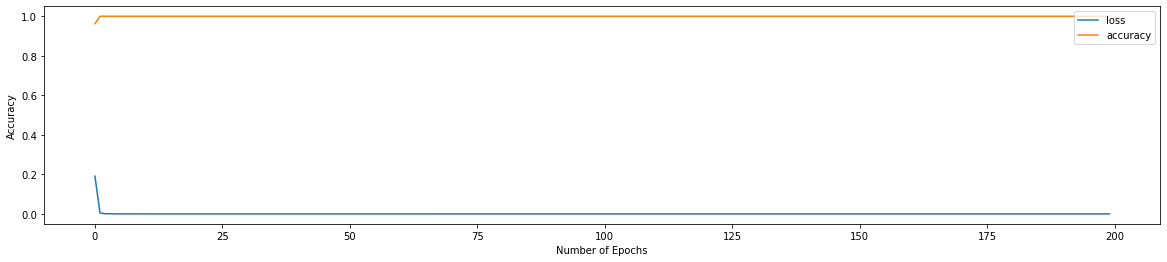

In [36]:
plt.figure(figsize = (20, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend([ 'loss', 'accuracy'], loc = 'upper right')

plt.show()

In [37]:
test =np.array([[619, 42, 2, 0.00, 1, 1, 1, 101348.88, 1, 0, 0, 1, 0]])
model.predict(test)

array([[1.]], dtype=float32)